In [1]:
 Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [2]:
# Import data
prepare_passenger_data = pd.read_csv("passenger_data.csv")
prepare_infrastructure_data = pd.read_csv("InfrastructureInvestments_data.csv")
prepare_population_data = pd.read_csv("population_data.csv")
gdp_data = pd.read_csv("GDP_data.csv")
gdp_per_capita_data = pd.read_csv("GDP_per_capita_data.csv")

# Choose the timeframe you want to consider
start_timeframe = 2000
end_timeframe = 2020

In [3]:
# Prepare data

num_of_countries = gdp_data.shape[0]
num_of_columns = gdp_data.shape[1]

# Make new dataframes in same format as gdp_data and gdp_per_capita_data
passenger_data = pd.DataFrame(columns=gdp_data.columns)
infrastructure_data = pd.DataFrame(columns=gdp_data.columns)
population_data = pd.DataFrame(columns=gdp_data.columns)

# Initialize dataframe
for i in range(num_of_countries):
    passenger_data.loc[i] = ['..' for _ in range(num_of_columns)]
    infrastructure_data.loc[i] = ['..' for _ in range(num_of_columns)]
    population_data.loc[i] = ['..' for _ in range(num_of_columns)]

# Every row corresponds to data of a country
for i in range(num_of_countries):
    passenger_data.loc[i, "Country"] = gdp_data.loc[i, "Country"]
    infrastructure_data.loc[i, "Country"] = gdp_data.loc[i, "Country"]
    population_data.loc[i, "Country"] = gdp_data.loc[i, "Country"]

# Fill dataframes with values if they exist
for country in gdp_data["Country"]:
    country_index = gdp_data.loc[gdp_data["Country"] == country].index[0]

    for year in gdp_data.columns[1:]:
        if ((prepare_passenger_data["LOCATION"] == country) & 
                                      (prepare_passenger_data["TIME"] == int(year))).any():
            if np.isnan(prepare_passenger_data["Value"].iloc[prepare_passenger_data.loc[(prepare_passenger_data["LOCATION"] == country) & 
                                      (prepare_passenger_data["TIME"] == int(year))].index[0]]) :
                continue
            else:
                passenger_data.loc[country_index,year] = prepare_passenger_data["Value"].iloc[prepare_passenger_data.loc[(prepare_passenger_data["LOCATION"] == country) & 
                                      (prepare_passenger_data["TIME"] == int(year))].index[0]]
                
        if ((prepare_infrastructure_data["LOCATION"] == country) & 
                                      (prepare_infrastructure_data["TIME"] == int(year))).any():
            if np.isnan(prepare_infrastructure_data["Value"].iloc[prepare_infrastructure_data.loc[(prepare_infrastructure_data["LOCATION"] == country) & 
                                      (prepare_infrastructure_data["TIME"] == int(year))].index[0]]):
                continue
            else:
                infrastructure_data.loc[country_index,year] = prepare_infrastructure_data["Value"].iloc[prepare_infrastructure_data.loc[(prepare_infrastructure_data["LOCATION"] == country) & 
                                        (prepare_infrastructure_data["TIME"] == int(year))].index[0]]
        
        if ((prepare_population_data["Code"] == country) & 
                                      (prepare_population_data["Year"] == int(year))).any():
            if np.isnan(prepare_population_data["Population"].iloc[prepare_population_data.loc[(prepare_population_data["Code"] == country) & 
                                      (prepare_population_data["Year"] == int(year))].index[0]]):
                continue
            else:
                population_data.loc[country_index,year] = prepare_population_data["Population"].iloc[prepare_population_data.loc[(prepare_population_data["Code"] == country) & 
                                        (prepare_population_data["Year"] == int(year))].index[0]]
                
print(population_data)

    Country      1995      1996      1997      1998      1999      2000  \
0       AFG  16418911  17106600  17788818  18493134  19262854  19542986   
1       ALB   3284370   3271336   3253721   3232185   3208265   3182027   
2       DZA  28478024  28984640  29476030  29924664  30346086  30774624   
3       ASM     53421     54523     55595     56626     57617     58251   
4       AND     62944     64166     64702     65204     65675     66116   
..      ...       ...       ...       ...       ...       ...       ...   
212     VIR    103468    104648    105801    106879    107842    108199   
213     PSE   2623149   2734003   2847222   2950926   3044490   3139950   
214     YEM  16103338  16614329  17108686  17608138  18114552  18628704   
215     ZMB   8684139   8902025   9133160   9372432   9621248   9891140   
216     ZWE  10994044  11178171  11362406  11548365  11716452  11834679   

         2001      2002      2003  ...      2011      2012      2013  \
0    19688634  21000258  22

In [4]:
# Create empty dataframe to check on what timeframe there is data per country
data_empty = {'Country': [], 'Timeframe passenger': [], 'Timeframe infrastructure': []}
country_timeframe = pd.DataFrame(data_empty)

# Determine timeframe per country for passenger and infrastructure data
for country in gdp_data["Country"]:
    country_index = gdp_data.loc[gdp_data["Country"] == country].index[0]

    passenger_start = 0
    passenger_stop = 0
    passenger_count = 0

    infrastructure_start = 0
    infrastructure_stop = 0
    infrastructure_count = 0
    
    for year in gdp_data.columns[1:]:
        if passenger_data.loc[country_index,year] != "..":
            if passenger_start == 0:
                passenger_start = int(year)
            passenger_stop = int(year)
            passenger_count += 1

        if infrastructure_data.loc[country_index,year] != "..":
            if infrastructure_start == 0:
                infrastructure_start = int(year)
            infrastructure_stop = int(year)
            infrastructure_count += 1

    # Continue if there is no data for a country or there is data missing in between
    if (passenger_stop - passenger_start + 1 != passenger_count or
        infrastructure_stop - infrastructure_start + 1 != infrastructure_count):
        continue

    else:
        new_row = {'Country': country, 'Timeframe passenger': "{}-{}".format(passenger_start,passenger_stop), 'Timeframe infrastructure': "{}-{}".format(infrastructure_start,infrastructure_stop)}
        country_timeframe = country_timeframe.append(new_row, ignore_index=True)

# Create empty list for countries that have data for entire timeframe
feasible_countries = []

for country in country_timeframe["Country"]:
    country_index = country_timeframe.loc[country_timeframe["Country"] == country].index[0]

    years_timeframe_passenger = country_timeframe["Timeframe passenger"].iloc[country_index].split('-')
    years_timeframe_infrastructure = country_timeframe["Timeframe infrastructure"].iloc[country_index].split('-')

    start_year_passenger = int(years_timeframe_passenger[0])
    end_year_passenger = int(years_timeframe_passenger[1])

    start_year_infrastructure = int(years_timeframe_infrastructure[0])
    end_year_infrastructure = int(years_timeframe_infrastructure[1])

    # Add countries to feasible_countries if data is available on entire timeframe for both passengers and infrastructure
    if (max(start_year_passenger,start_year_infrastructure) <= start_timeframe) & (min(end_year_passenger,end_year_infrastructure) >= end_timeframe):
        feasible_countries.append(country)

# Drop all years from dataframe that are not in timeframe
for year in gdp_data.columns[1:]:
    if int(year) < start_timeframe or int(year) > end_timeframe:
        gdp_data = gdp_data.drop(year, axis=1)
        gdp_per_capita_data = gdp_per_capita_data.drop(year, axis=1)
        passenger_data = passenger_data.drop(year, axis=1)
        infrastructure_data = infrastructure_data.drop(year, axis=1)

# Drop all countries from dataframe that are not in feasible countries
gdp_data = gdp_data[gdp_data['Country'].isin(feasible_countries)]
gdp_per_capita_data = gdp_per_capita_data[gdp_per_capita_data['Country'].isin(feasible_countries)]
passenger_data = passenger_data[passenger_data['Country'].isin(feasible_countries)]
infrastructure_data = infrastructure_data[infrastructure_data['Country'].isin(feasible_countries)]

C:\Users\Van Heijningen\AppData\Local\Temp\ipykernel_19872\1352832676.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_timeframe = country_timeframe.append(new_row, ignore_index=True)
C:\Users\Van Heijningen\AppData\Local\Temp\ipykernel_19872\1352832676.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_timeframe = country_timeframe.append(new_row, ignore_index=True)
C:\Users\Van Heijningen\AppData\Local\Temp\ipykernel_19872\1352832676.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_timeframe = country_timeframe.append(new_row, ignore_index=True)
C:\Users\Van Heijningen\AppData\Local\Temp\ipykernel_19872\1352832676.py:37: FutureWarning: The frame.append method is deprecated and will be rem

In [6]:
# Set countries as index to make plotting easier
gdp_data.set_index('Country', inplace=True)
gdp_data = gdp_data.applymap(lambda x: '{:.0f}'.format(float(x)))  # Convert large numbers (e-powers) to normal numbers
gdp_per_capita_data.set_index('Country', inplace=True)
passenger_data.set_index('Country', inplace=True)
infrastructure_data.set_index('Country', inplace=True)

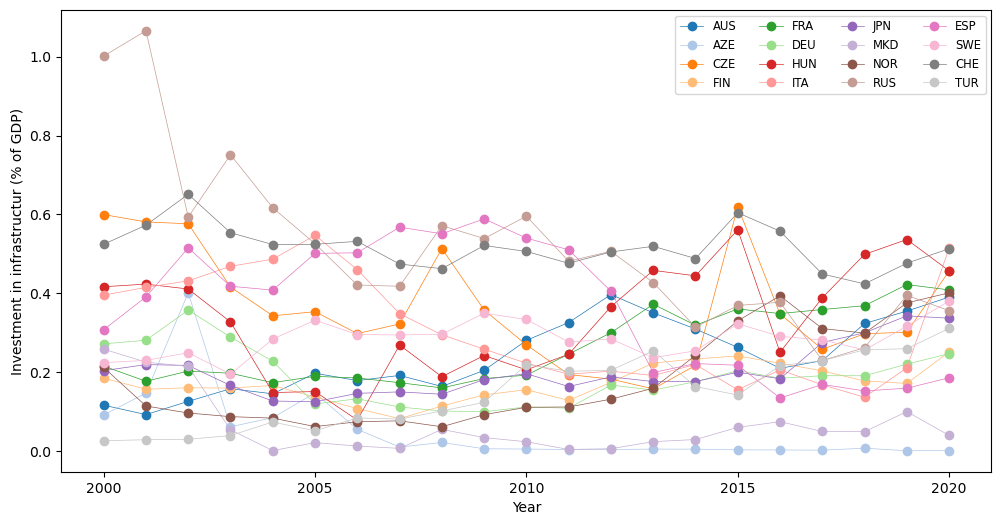

In [7]:
infrastructure_data = infrastructure_data.astype(float)
gdp_data = gdp_data.astype(float)

# Determine percentage of GDP that is invested in railway infrastructure
infrastructure_gdp = infrastructure_data / gdp_data * 100

# Create figure
plt.figure(figsize=(12, 6))

# Plot every country
for i, (index, row) in enumerate(infrastructure_gdp.iterrows()):
    plt.plot(row.index, row.values, marker='o', label=f'{index}', linewidth=0.5, color=plt.cm.tab20(i))

# Adjust years on x-axis for visibility
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=5))

plt.xlabel('Year')
plt.ylabel('Investment in infrastructur (% of GDP)')

plt.legend(loc='upper right', fontsize='small', ncol = 4)
plt.show()

In [64]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
from matplotlib.animation import FuncAnimation
import plotly.express as px

# Import data
passenger_data = pd.read_csv("passenger_new.csv", index_col='Country')
infrastructure_road_data = pd.read_csv("infrastructure_road_new.csv", index_col='Country')
infrastructure_train_data = pd.read_csv("infrastructure_train_new.csv", index_col='Country')
population_data = pd.read_csv("population_new.csv", index_col='Country')
gdp_data = pd.read_csv("gdp_new.csv", index_col='Country')
gdp_per_capita_data = pd.read_csv("GDP_per_capita_new.csv", index_col='Country')

# Set the data type of the used datasets to float

infrastructure_train_data = infrastructure_train_data.astype(float)
gdp_data = gdp_data.astype(float)

# Determine percentage of GDP that is invested in railway infrastructure
infrastructure_gdp = infrastructure_train_data / gdp_data*100

passenger_data = passenger_data.astype(float)
population_data = population_data.astype(float)

# Determine amount of kilometers travelled per passenger
# Note that passenger data is the total amount of kilometers travelled in millions
km_per_passenger = passenger_data / population_data*1000000

In [72]:
# Determine the average for all years of both of the datasets
year_average_km_per_passenger = km_per_passenger.mean(axis=1)
year_average_infrastructure_gdp = infrastructure_gdp.mean(axis=1)
print(year_average_km_per_passenger)
print(year_average_infrastructure_gdp)

Country
AUS    12913.455031
AZE     1789.267842
CZE     7552.008289
FIN    13157.742081
FRA    12833.204304
DEU    11694.672477
HUN     7136.509977
ITA    13189.816665
MKD     3711.436504
NOR    12884.177900
RUS      970.007579
ESP     8234.177264
SWE    12180.539981
CHE    11602.311270
TUR     3173.803264
dtype: float64
Country
AUS    0.238655
AZE    0.050974
CZE    0.364972
FIN    0.171331
FRA    0.264666
DEU    0.188196
HUN    0.336695
ITA    0.310966
MKD    0.064183
NOR    0.182404
RUS    0.515205
ESP    0.364206
SWE    0.285101
CHE    0.517111
TUR    0.147739
dtype: float64


In [65]:
# Investments year average comparing with passenger transport year average dataframe making
df1 = pd.DataFrame(year_average_infrastructure_gdp)
df2 = pd.DataFrame(year_average_km_per_passenger)


In [69]:
# Combine the two data frames into a seperate data frame
df = pd.concat([df1, df2], axis=1)

#Set the column names
df.columns = ['Year average infrastructure gdp', 'Year average passenger km per person'] + list(df.columns[2:])

# Include the index as one of the columns as well
df_reset = df.reset_index()
print(df_reset)

   Country  Year average infrastructure gdp  \
0      AUS                         0.238655   
1      AZE                         0.050974   
2      CZE                         0.364972   
3      FIN                         0.171331   
4      FRA                         0.264666   
5      DEU                         0.188196   
6      HUN                         0.336695   
7      ITA                         0.310966   
8      MKD                         0.064183   
9      NOR                         0.182404   
10     RUS                         0.515205   
11     ESP                         0.364206   
12     SWE                         0.285101   
13     CHE                         0.517111   
14     TUR                         0.147739   

    Year average passenger km per person  
0                           12913.455031  
1                            1789.267842  
2                            7552.008289  
3                           13157.742081  
4                           1283

In [73]:
# Create a scatter plot using Plotly Express
fig = px.scatter(df_reset, x='Year average infrastructure gdp', y='Year average passenger km per person', color= 'Country',
                 title='Scatter Plot for Average Values', labels={'Investments': 'Average Investments', 'Passengers': 'Average Passengers'})

# Customize the layout
fig.update_layout(title='Investments vs. Passengers average 2000-2020',
                  xaxis_title='Investments average 2000-2020', yaxis_title='Passengers average 2000-2020')

# Show the plot
fig.show()
